In [1]:
import pandas as pd
import numpy as np

In [4]:
def link2id(x):
    return x.split('/')[-1].split('"')[0]


In [3]:
fake = pd.read_csv('fake_label.csv')
org = pd.read_csv('org_label.csv')

In [4]:
cols = ["INPUT:image","Race"]

In [5]:
race = pd.concat((org[cols], fake[cols]))
race['INPUT:image'] = race['INPUT:image'].apply(link2id)

In [48]:
race

,INPUT:image,Race
0,40501.png,0.0
1,40502.png,2.0
2,40503.png,3.0
3,40504.png,0.0
4,40505.png,0.0
...,...,...
495,img_991.png,0.0
496,img_993.png,2.0
497,img_995.png,0.0
498,img_997.png,0.0


## Worker Acc

In [2]:
result = pd.read_csv('assignments_from_pool_29960711__06-12-2021.tsv', sep='\t')

In [5]:

result['INPUT:image'] = result['INPUT:image'].apply(link2id)

In [6]:
result['GOLDEN:result'] = result['GOLDEN:result'].fillna(1.)
result['n_workers'] = np.ones(len(result))

In [7]:
aggregated_result = result.groupby('INPUT:image').sum()

In [8]:
final_result = aggregated_result[['OUTPUT:gender', 'OUTPUT:result', 'OUTPUT:confidence', 'GOLDEN:result', 'n_workers']]

In [9]:
org_worker = final_result[:500]
fake_worker = final_result[500:]

In [10]:
org_worker['acc'] = (org_worker['n_workers'] - org_worker['OUTPUT:result']) / org_worker['n_workers']
fake_worker['acc'] = fake_worker['OUTPUT:result'] / fake_worker['n_workers']

<ipython-input-10-9207e26f9854>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  org_worker['acc'] = (org_worker['n_workers'] - org_worker['OUTPUT:result']) / org_worker['n_workers']
<ipython-input-10-9207e26f9854>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_worker['acc'] = fake_worker['OUTPUT:result'] / fake_worker['n_workers']


In [16]:
org_worker[[ 'n_workers', 'acc']].to_csv('org_imgs_worker_acc.csv')
fake_worker[[ 'n_workers', 'acc']].to_csv('fake_imgs_worker_acc.csv')

In [13]:
worker = pd.concat((org_worker, fake_worker))

In [14]:
worker

,OUTPUT:gender,OUTPUT:result,OUTPUT:confidence,GOLDEN:result,n_workers,acc
INPUT:image,,,,,,
40501.png,0,0,0,0.0,3.0,1.000000
40502.png,0,0,2,0.0,3.0,1.000000
40503.png,0,0,0,0.0,4.0,1.000000
40504.png,0,3,3,0.0,4.0,0.250000
40505.png,4,0,1,0.0,4.0,1.000000
...,...,...,...,...,...,...
img_991.png,4,3,0,4.0,4.0,0.750000
img_993.png,3,5,0,5.0,5.0,1.000000
img_995.png,0,2,0,3.0,3.0,0.666667


In [15]:
worker_acc = worker[['acc', 'n_workers']].reset_index()

In [16]:
result = worker_acc.merge(race, on='INPUT:image')

In [17]:
result

,INPUT:image,acc,n_workers,Race
0,40501.png,1.000000,3.0,0.0
1,40502.png,1.000000,3.0,2.0
2,40503.png,1.000000,4.0,3.0
3,40504.png,0.250000,4.0,0.0
4,40505.png,1.000000,4.0,0.0
...,...,...,...,...
995,img_991.png,0.750000,4.0,0.0
996,img_993.png,1.000000,5.0,2.0
997,img_995.png,0.666667,3.0,0.0
998,img_997.png,0.000000,4.0,0.0


In [18]:
# real
result[:500]['Race'].value_counts()

0.0    326
2.0     93
3.0     36
1.0     29
4.0     15
Name: Race, dtype: int64

In [19]:
# fake
result[500:]['Race'].value_counts()

0.0    352
2.0     61
4.0     44
1.0     26
3.0     17
Name: Race, dtype: int64

In [20]:
result[:500].groupby('Race').mean()

,acc,n_workers
Race,,
0.0,0.826687,3.702454
1.0,0.872414,3.655172
2.0,0.802867,3.505376
3.0,0.832407,3.777778
4.0,0.812222,3.133333


In [21]:
result[500:].groupby('Race').mean()

,acc,n_workers
Race,,
0.0,0.661032,3.500000
1.0,0.787179,3.730769
2.0,0.676776,3.672131
3.0,0.724510,3.411765
4.0,0.736364,3.500000


In [22]:
result.groupby('Race').mean()

,acc,n_workers
Race,,
0.0,0.740683,3.597345
1.0,0.832121,3.690909
2.0,0.752922,3.571429
3.0,0.797799,3.660377
4.0,0.755650,3.406780


## Visualize

In [23]:
import matplotlib.pyplot as plt

In [45]:
def freq_bar(y1, y2, title):
    race_list = ['white', 'black', 'asian', 'indian', 'others']

    fig, ax = plt.subplots()
    x = np.arange(len(race_list))
    width = 0.35

    p1 = ax.bar(x - width/2, y1, width, label='Real')
    p2 = ax.bar(x + width/2, y2, width, label='Fake')
    # ax.bar_label(p1)
    # ax.bar_label(p2)

    ax.set_title(title)

    ax.set_xticks(x)
    ax.set_xticklabels(race_list)

    ax.legend(loc='lower left')
    return fig

In [53]:
result[:500]['Race'].value_counts().sort_index()

0.0    326
1.0     29
2.0     93
3.0     36
4.0     15
Name: Race, dtype: int64

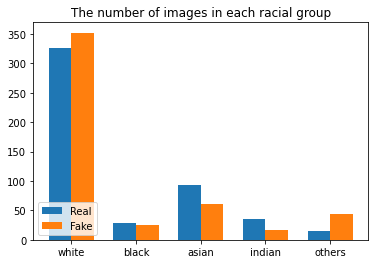

In [54]:
fig = freq_bar(result[:500]['Race'].value_counts().sort_index(), 
               result['Race'][500:].value_counts().sort_index(), 
               'The number of images in each racial group')
fig.savefig('n_imgs.png')

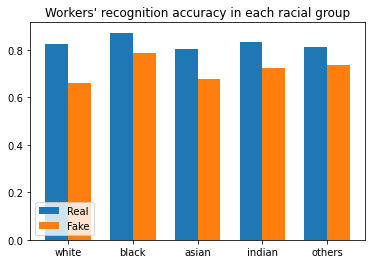

In [49]:
fig = freq_bar(result[:500].groupby('Race').mean()['acc'], result[500:].groupby('Race').mean()['acc'],
     "Workers' recognition accuracy in each racial group")
fig.savefig('acc.png')

In [ ]:
result.groupby('Race').mean()

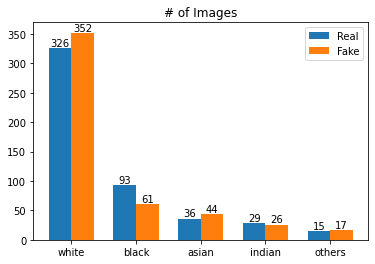

In [26]:
fig, ax = plt.subplots()
x = np.arange(len(race_list))
width = 0.35

p1 = ax.bar(x - width/2, result[:500]['Race'].value_counts().values, width, label='Real')
p2 = ax.bar(x + width/2, result[500:]['Race'].value_counts().values, width, label='Fake')
ax.bar_label(p1)
ax.bar_label(p2)

ax.set_title('# of Images')

ax.set_xticks(x)
ax.set_xticklabels(race_list)

ax.legend()